# Coursera Captstone: Battle of the Neighborhoods

### Introduction
#### The CEO of Globo Gym, John Smith, would like to open a new gym location in Washington DC. 

### Problem Statement
#### Mr. Smith does not want to open a gym in a location that is within 300 meters of another gym, and he wants a location that has at least 2 dining options within 100 meters of his location so that his clientele has somewhere to eat. DC is generally ranked as one of the "healthiest" cities in America, Mr. Smith will need all of the data I can leverage to ensure his business has the best chance of being successful. 

### Data to be used
#### I will leverage Foursquare API to provide a list of areas for Mr. Smith to consider for his gym, based on his criteria. I will also be using a data source of Washington DC neighborhoods from the web (Open Data DC). The DC Ward data csv is available on [GitHub](https://github.com/Alexdowd2/Coursera_Captstone). Additionally, I will gather other health and demographic information from the 500 Cities Project. That CSV is also available on GitHub. 

### DC Population Analysis
#### Below is my analysis of DC population breakdown by ward based on the data from Open Data DC

In [15]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_39b4b85b2fa34fcc8fed759db0f6e7a2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Gx1zIIdh6Zd2Aavm9oE7oiVXz4e2OdiUIwWG96Noggt-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_39b4b85b2fa34fcc8fed759db0f6e7a2.get_object(Bucket='courseracapstone-donotdelete-pr-0slc59bqmfhz93',Key='DC_Ward_Data2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dc_pop = pd.read_csv(body)
dc_pop.rename(columns={'Pct Over 66': 'Pct Over 65'},inplace=True)
dc_pop


,Ward,Year,Total Population,Pct Over 65,Population Over 65
0,1,2016,83256,7.5%,6244
1,2,2016,76459,8.7%,6652
2,3,2016,82930,17.0%,14098
3,4,2016,84120,14.0%,11777
4,5,2016,85504,14.0%,11971
5,6,2016,87793,10.0%,8779
6,7,2016,75829,14.0%,10616
7,8,2016,83119,8.0%,6650


In [17]:
# Wards sorted by Total Population

dc_pop.sort_values(by="Total Population",ascending=False)

,Ward,Year,Total Population,Pct Over 65,Population Over 65
5,6,2016,87793,10.0%,8779
4,5,2016,85504,14.0%,11971
3,4,2016,84120,14.0%,11777
0,1,2016,83256,7.5%,6244
7,8,2016,83119,8.0%,6650
2,3,2016,82930,17.0%,14098
1,2,2016,76459,8.7%,6652
6,7,2016,75829,14.0%,10616


#### As we can see, Ward 1 has the smallest population of people over 65

In [18]:
# Wards Sorted by Total Population Over 65
dc_pop_sorted = dc_pop.sort_values("Population Over 65")
dc_pop_sorted

,Ward,Year,Total Population,Pct Over 65,Population Over 65
0,1,2016,83256,7.5%,6244
7,8,2016,83119,8.0%,6650
1,2,2016,76459,8.7%,6652
5,6,2016,87793,10.0%,8779
6,7,2016,75829,14.0%,10616
3,4,2016,84120,14.0%,11777
4,5,2016,85504,14.0%,11971
2,3,2016,82930,17.0%,14098


### The below bar chart visualizes the population breakdown by Ward

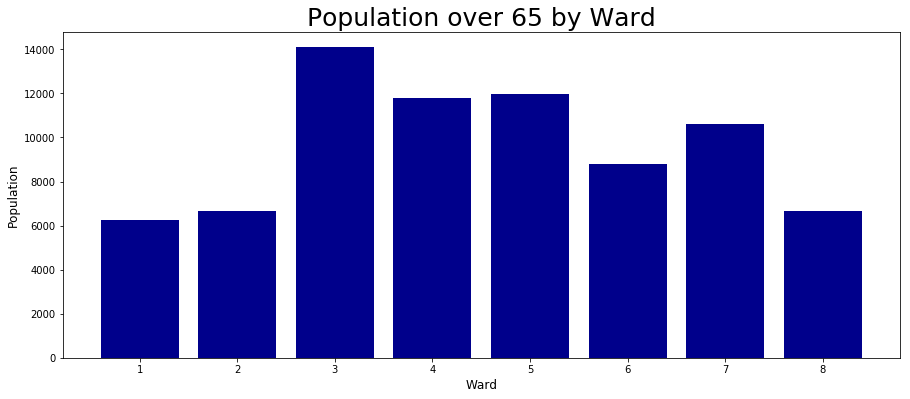

In [19]:
plt.figure(figsize=(15,6))
plt.bar('Ward','Population Over 65',data=dc_pop_sorted,color='darkblue')

plt.xlabel("Ward",size=12)
plt.ylabel("Population",size=12)
plt.title('Population over 65 by Ward',size=25)

plt.show()

## From what we can see here, Ward 1 has the lowest population over 65 of all the Wards. This is positive for a gym environment, as older people are less likely to hold gym memberships, and they are less likely to exercise. Being located around a younger population is crucial to success. Below, we will look at the income distributions in Ward 1, to show that the residents can, in fact, afford a gym membership. 

### Income Analysis for Ward 1

In [20]:

body = client_39b4b85b2fa34fcc8fed759db0f6e7a2.get_object(Bucket='courseracapstone-donotdelete-pr-0slc59bqmfhz93',Key='Ward_1_Income.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df.head()


,Income,Ward,Households,Percent of Households
0,"Under $15,000",1,4057,0.0888
1,"$15,000 - $24,999",1,2290,0.0501
2,"$25,000 - $34,999",1,2188,0.0479
3,"$35,000 - $49,999",1,2484,0.0544
4,"$50,000 - $74,999",1,5166,0.1131


In [21]:
df['% of Households'] = df['Percent of Households']*100
df.head()

,Income,Ward,Households,Percent of Households,% of Households
0,"Under $15,000",1,4057,0.0888,8.88
1,"$15,000 - $24,999",1,2290,0.0501,5.01
2,"$25,000 - $34,999",1,2188,0.0479,4.79
3,"$35,000 - $49,999",1,2484,0.0544,5.44
4,"$50,000 - $74,999",1,5166,0.1131,11.31


In [22]:
df.drop('Percent of Households',axis=1,inplace=True)
df

,Income,Ward,Households,% of Households
0,"Under $15,000",1,4057,8.88
1,"$15,000 - $24,999",1,2290,5.01
2,"$25,000 - $34,999",1,2188,4.79
3,"$35,000 - $49,999",1,2484,5.44
4,"$50,000 - $74,999",1,5166,11.31
5,"$75,000 - $99,999",1,5212,11.40
6,"$100,000 - $124,999",1,4610,10.09
7,"$125,000 - $149,999",1,4025,8.81
8,"$150,000 - $199,999",1,5376,11.76
9,"$200,000 - $249,999",1,3137,6.86


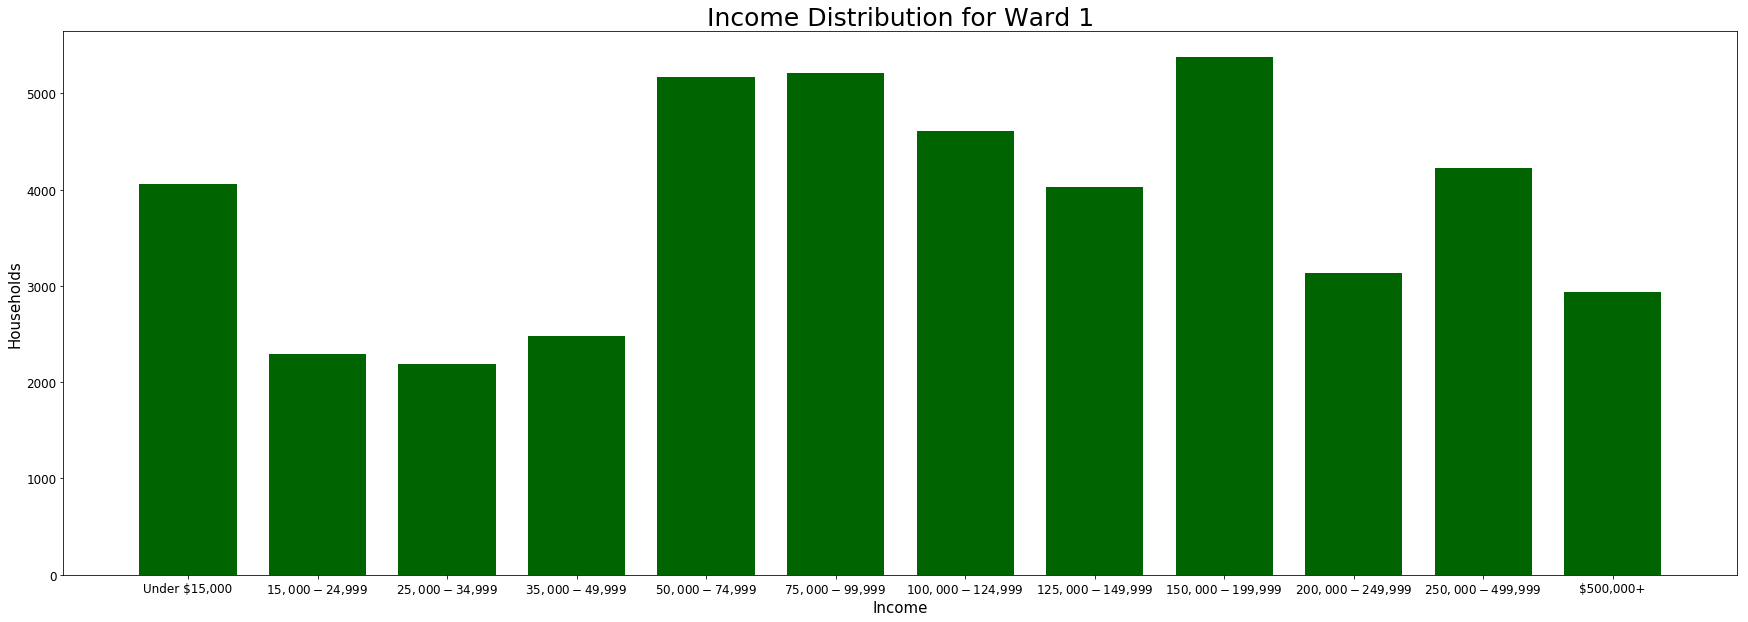

In [23]:
plt.figure(figsize=(30,10))
plt.bar('Income','Households',data=df,color='darkgreen',width=0.75)

plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('Income',size=15)
plt.ylabel('Households',size=15)
plt.title('Income Distribution for Ward 1',size=25)

plt.show()

### Here we can see that most of the Ward's residents are earning between \$50K and \\$199K which puts them well within range of being able to afford the gym membership. According to an anlysis done by the CoStar Group, the median price of a 1 bedroom apartment in Ward 1 is just over \\$1,800/month [Source](https://www.dcpolicycenter.org/publications/appraising-the-districts-rentals-chapter-iii/#:~:text=Based%20on%20this%20analysis%2C%20the,and%208%20(under%20%24100).)

### Foursquare Analysis for Gym Distributions

In [24]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [25]:
CLIENT_ID = 'XXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AD4BXV4IPIJCRD2Y3YIQ11LHY032MPN3MFDB30IMPJKZB5EO
CLIENT_SECRET:1XP5GRUNTL23XYJSWJ4DWXG353OOFWXA0BL2GDFQUNQDMM0O


In [26]:
# This address is to Target, more or less in the middle of Ward 1

address = '3100 14th St NW, Washington, DC 20010'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

38.9298584 -77.03332391453975


In [27]:
search_query = 'Gym'
radius = 1000
print(search_query + ' .... OK!')

Gym .... OK!


In [28]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=AD4BXV4IPIJCRD2Y3YIQ11LHY032MPN3MFDB30IMPJKZB5EO&client_secret=1XP5GRUNTL23XYJSWJ4DWXG353OOFWXA0BL2GDFQUNQDMM0O&ll=38.9298584,-77.03332391453975&v=20180604&query=Gym&radius=1000&limit=30'

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f53f577b5de2b6f48ade944'},
 'response': {'venues': [{'id': '5be10ed4da5ede002cc78cbf',
    'name': 'LINE Hotel Gym',
    'location': {'lat': 38.922819,
     'lng': -77.04169,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.922819,
       'lng': -77.04169}],
     'distance': 1067,
     'cc': 'US',
     'city': 'Washington',
     'state': 'D.C.',
     'country': 'United States',
     'formattedAddress': ['Washington, D.C.', 'United States']},
    'categories': [{'id': '4bf58dd8d48988d175941735',
      'name': 'Gym / Fitness Center',
      'pluralName': 'Gyms or Fitness Centers',
      'shortName': 'Gym / Fitness',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1599338376',
    'hasPerk': False},
   {'id': '4ca0efff03133704a4407fd5',
    'name': 'Dorchester Gym',
    'location': {'address': '1625 Kalorama Rd. NW',
     'lat': 38.9231

In [30]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
dataframe.head()

(30, 17)


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,5be10ed4da5ede002cc78cbf,NaN,US,Washington,United States,NaN,1067,"[Washington, D.C., United States]","[{'label': 'display', 'lat': 38.922819, 'lng':...",38.922819,-77.041690,NaN,D.C.,LINE Hotel Gym,v-1599338376
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4ca0efff03133704a4407fd5,1625 Kalorama Rd. NW,US,Washington,United States,NaN,853,"[1625 Kalorama Rd. NW, Washington, D.C. 20009,...","[{'label': 'display', 'lat': 38.92311033232111...",38.923110,-77.038012,20009,D.C.,Dorchester Gym,v-1599338376
2,"[{'id': '4bf58dd8d48988d1b2941735', 'name': 'C...",False,4cf90e43ce1da1cdfa67cbe1,2801 Georgia Ave NW,US,Washington,United States,NaN,1035,"[2801 Georgia Ave NW, Washington, D.C. 20001, ...","[{'label': 'display', 'lat': 38.925988, 'lng':...",38.925988,-77.022445,20001,D.C.,Burr Gym Annex,v-1599338376
3,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,5c57463757a53700398c2d90,3828 Georgia Ave NW,US,Washington,United States,NaN,1184,"[3828 Georgia Ave NW, Washington, D.C. 20011, ...","[{'label': 'display', 'lat': 38.93819427490234...",38.938194,-77.024826,20011,D.C.,The Swift Gym,v-1599338376
4,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,587badc7dfa6ff736b98e7bf,NaN,US,Washington,United States,NaN,126,"[Washington, D.C., United States]","[{'label': 'display', 'lat': 38.930152, 'lng':...",38.930152,-77.031916,NaN,D.C.,Park Triangle Gym,v-1599338376


### As we can see, there are currently 30 gyms within 1000 meters of the Target in Ward 1/Columbia Heights. The map below shows their locations.

In [31]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,LINE Hotel Gym,Gym / Fitness Center,NaN,US,Washington,United States,NaN,1067,"[Washington, D.C., United States]","[{'label': 'display', 'lat': 38.922819, 'lng':...",38.922819,-77.041690,NaN,D.C.,5be10ed4da5ede002cc78cbf
1,Dorchester Gym,Gym,1625 Kalorama Rd. NW,US,Washington,United States,NaN,853,"[1625 Kalorama Rd. NW, Washington, D.C. 20009,...","[{'label': 'display', 'lat': 38.92311033232111...",38.923110,-77.038012,20009,D.C.,4ca0efff03133704a4407fd5
2,Burr Gym Annex,College Gym,2801 Georgia Ave NW,US,Washington,United States,NaN,1035,"[2801 Georgia Ave NW, Washington, D.C. 20001, ...","[{'label': 'display', 'lat': 38.925988, 'lng':...",38.925988,-77.022445,20001,D.C.,4cf90e43ce1da1cdfa67cbe1
3,The Swift Gym,Gym / Fitness Center,3828 Georgia Ave NW,US,Washington,United States,NaN,1184,"[3828 Georgia Ave NW, Washington, D.C. 20011, ...","[{'label': 'display', 'lat': 38.93819427490234...",38.938194,-77.024826,20011,D.C.,5c57463757a53700398c2d90
4,Park Triangle Gym,Gym / Fitness Center,NaN,US,Washington,United States,NaN,126,"[Washington, D.C., United States]","[{'label': 'display', 'lat': 38.930152, 'lng':...",38.930152,-77.031916,NaN,D.C.,587badc7dfa6ff736b98e7bf
5,The Gym at Highland Park,Gym,1400 Irving St NW,US,Washington,United States,14th street nw,167,"[1400 Irving St NW (14th street nw), Washingto...","[{'label': 'display', 'lat': 38.92835631385272...",38.928356,-77.033507,20010,D.C.,4c3be37f4bc9a593fa08d271
6,Allegro Gym,Gym,NaN,US,Washington,United States,NaN,353,"[Washington, D.C. 20010, United States]","[{'label': 'display', 'lat': 38.93299756266501...",38.932998,-77.033959,20010,D.C.,4bdb5cf52a3a0f4757acaeb6
7,Citadel Apartments Gym,Gym / Fitness Center,1631 Kalorama Rd NW,US,Washington,United States,NaN,982,"[1631 Kalorama Rd NW, Washington, D.C. 20009, ...","[{'label': 'display', 'lat': 38.9219856262207,...",38.921986,-77.038445,20009,D.C.,5c5973a4f5e9d7002ca563d0
8,Lime Lite Boxing Gym,Gym,3541 11th St NW,US,Washington,United States,Otis Pl,630,"[3541 11th St NW (Otis Pl), Washington, D.C. 2...","[{'label': 'display', 'lat': 38.933893, 'lng':...",38.933893,-77.028217,20010,D.C.,4c61c11069a1c9b6570c37a4
9,Argonne Gym,Gym,1629 Columbia Rd NW,US,Washington,United States,NaN,706,"[1629 Columbia Rd NW, Washington, D.C. 20009, ...","[{'label': 'display', 'lat': 38.92554868645271...",38.925549,-77.039318,20009,D.C.,4ca1d533031337043d4e86d5


In [32]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around Target

# add a red circle marker to represent the Target
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Target',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the gym locations as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

### Now that we can see where there are gyms within 1000 meters of a central point of Ward 1, let's use KNN to predict future categories of gyms.

In [33]:
import itertools
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
print("Libraries loaded")

Libraries loaded


In [34]:
# How many of each class are in the dataset

dataframe_filtered['categories'].value_counts()
dataframe_filtered.columns

Index(['name', 'categories', 'address', 'cc', 'city', 'country', 'crossStreet',
       'distance', 'formattedAddress', 'labeledLatLngs', 'lat', 'lng',
       'postalCode', 'state', 'id'],
      dtype='object')

In [35]:
# First, establish the data frame to use for the feature set

df_k = dataframe_filtered[['name','categories','address','city','crossStreet','postalCode','lat','lng']]
df_k.head()


,name,categories,address,city,crossStreet,postalCode,lat,lng
0,LINE Hotel Gym,Gym / Fitness Center,NaN,Washington,NaN,NaN,38.922819,-77.041690
1,Dorchester Gym,Gym,1625 Kalorama Rd. NW,Washington,NaN,20009,38.923110,-77.038012
2,Burr Gym Annex,College Gym,2801 Georgia Ave NW,Washington,NaN,20001,38.925988,-77.022445
3,The Swift Gym,Gym / Fitness Center,3828 Georgia Ave NW,Washington,NaN,20011,38.938194,-77.024826
4,Park Triangle Gym,Gym / Fitness Center,NaN,Washington,NaN,NaN,38.930152,-77.031916


In [36]:
# next, we need to remove the spaces in the string columns to convert to numeric

df_k['name'] = df_k['name'].str.replace(" ","_")
df_k['categories'] = df_k['categories'].str.replace(" ","_")
df_k['address'] = df_k['address'].str.replace(" ","_")
df_k['city'] = df_k['city'].str.replace(" ","_")
df_k['crossStreet'] = df_k['crossStreet'].str.replace(" ","_")
df_k['postalCode'] = df_k['postalCode'].str.replace(" ","_")

df_k.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

,name,categories,address,city,crossStreet,postalCode,lat,lng
0,LINE_Hotel_Gym,Gym_/_Fitness_Center,NaN,Washington,NaN,NaN,38.922819,-77.041690
1,Dorchester_Gym,Gym,1625_Kalorama_Rd._NW,Washington,NaN,20009,38.923110,-77.038012
2,Burr_Gym_Annex,College_Gym,2801_Georgia_Ave_NW,Washington,NaN,20001,38.925988,-77.022445
3,The_Swift_Gym,Gym_/_Fitness_Center,3828_Georgia_Ave_NW,Washington,NaN,20011,38.938194,-77.024826
4,Park_Triangle_Gym,Gym_/_Fitness_Center,NaN,Washington,NaN,NaN,38.930152,-77.031916


In [37]:
# check dtypes to convert

df_k.dtypes

name            object
categories      object
address         object
city            object
crossStreet     object
postalCode      object
lat            float64
lng            float64
dtype: object

In [38]:
# convert the object types to category, then from there to int using cat.codes

df_k['name'] = df_k['name'].astype('category')
df_k['categories'] = df_k['categories'].astype('category')
df_k['address'] = df_k['address'].astype('category')
df_k['city'] = df_k['city'].astype('category')
df_k['crossStreet'] = df_k['crossStreet'].astype('category')
df_k['postalCode'] = df_k['postalCode'].astype('category')

df_k.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

name           category
categories     category
address        category
city           category
crossStreet    category
postalCode     category
lat             float64
lng             float64
dtype: object

In [39]:
cat_columns = df_k.select_dtypes(['category']).columns
cat_columns

Index(['name', 'categories', 'address', 'city', 'crossStreet', 'postalCode'], dtype='object')

In [40]:
df_k[cat_columns] = df_k[cat_columns].apply(lambda x: x.cat.codes)
df_k

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,name,categories,address,city,crossStreet,postalCode,lat,lng
0,14,3,-1,0,-1,-1,38.922819,-77.041690
1,12,2,3,0,-1,1,38.923110,-77.038012
2,3,1,11,0,-1,0,38.925988,-77.022445
3,26,3,14,0,-1,3,38.938194,-77.024826
4,21,3,-1,0,-1,-1,38.930152,-77.031916
5,24,2,2,0,0,2,38.928356,-77.033507
6,0,2,-1,0,-1,2,38.932998,-77.033959
7,8,3,5,0,-1,1,38.921986,-77.038445
8,15,2,13,0,2,2,38.933893,-77.028217
9,1,2,4,0,-1,1,38.925549,-77.039318


### Now that the dataframe is numeric, we can run the KNN technique to accurately predict the category of future establishments in the area. Remember, one of the criteria is to not have another gym within 500 meters of Globo Gym. There are differences between a regular gym (such as Globo Gym) and gym's that are more exclusive, such as gyms located on college campuses, in apartment complexes, or in hotels. These gyms would not be competing with Globo Gym. 

In [41]:
X = df_k[['name','address','lat','lng']].values
X

array([[ 14.        ,  -1.        ,  38.922819  , -77.04169   ],
       [ 12.        ,   3.        ,  38.92311033, -77.03801183],
       [  3.        ,  11.        ,  38.925988  , -77.022445  ],
       [ 26.        ,  14.        ,  38.93819427, -77.02482605],
       [ 21.        ,  -1.        ,  38.930152  , -77.031916  ],
       [ 24.        ,   2.        ,  38.92835631, -77.03350733],
       [  0.        ,  -1.        ,  38.93299756, -77.03395864],
       [  8.        ,   5.        ,  38.92198563, -77.03844452],
       [ 15.        ,  13.        ,  38.933893  , -77.028217  ],
       [  1.        ,   4.        ,  38.92554869, -77.03931761],
       [ 29.        ,  -1.        ,  38.923551  , -77.031262  ],
       [ 22.        ,  -1.        ,  38.92650447, -77.03925266],
       [ 28.        ,  -1.        ,  38.936763  , -77.037429  ],
       [ 19.        ,   6.        ,  38.92674255, -77.04281616],
       [  9.        ,  -1.        ,  38.92206675, -77.03042371],
       [ 18.        ,  -1

In [42]:
y = df_k['categories'].values
y

array([ 3,  2,  1,  3,  3,  2,  2,  3,  2,  2,  4,  2,  1,  2,  0,  2,  2,
        2,  2,  3,  2, -1, -1,  2,  2,  2,  2,  4,  2,  4], dtype=int8)

In [43]:
# Normalize the data

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (24, 4) (24,)
Test set: (6, 4) (6,)


In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
k = 4
  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [47]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 3, 0, 2, 2], dtype=int8)

In [48]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5
Test set Accuracy:  0.6666666666666666


In [49]:
# select the best K betweeen 1 and 10

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

# Based on this test, K = 3 is the optimum K for testing accuracy, at 83%. 

array([0.5       , 0.83333333, 0.66666667, 0.66666667, 0.83333333,
       0.83333333, 0.66666667, 0.83333333, 0.83333333])

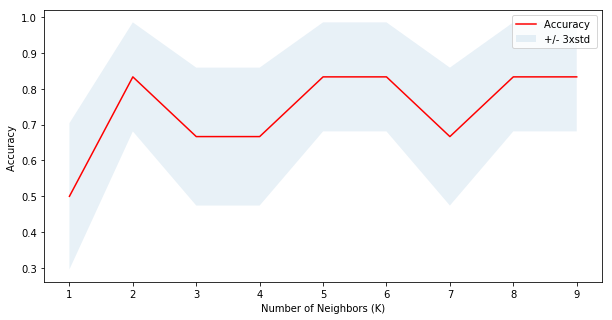

The best accuracy was: 0.8333333333333334
With a K value of 2


In [50]:
# We can visualize the distributions

plt.figure(figsize=(10,5))
plt.plot(range(1,Ks),mean_acc,'red')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

print( "The best accuracy was:", mean_acc.max())
print("With a K value of", mean_acc.argmax()+1) 

### So, what part of Ward 1 should John Smith look to open his Globo Gym franchise?

In [97]:
#This is the point which we will draw a 200 meter circle around

gym_address = '3220 17th St NW, Washington, DC 20010'

geo_loc = Nominatim(user_agent="foursquare_agent")
loc = geolocator.geocode(gym_address)
lat = loc.latitude
long = loc.longitude
print(lat, long)

38.9321523 -77.0390821


In [98]:
# Build and display the map with propsed build area in purple, 300 meter buffer radius in red, and current gym locations in blue.

gym_map = folium.Map(location=[lat, long], zoom_start=12)

folium.Circle(
    [lat, long],
    radius=100,
    color='purple',
    popup=label,
    fill = True,
    fill_color = 'purple',
    fill_opacity = 0.3
).add_to(gym_map)

folium.Circle(
    [lat, long],
    radius=300,
    color='red',
    popup=label,
    fill = True,
    fill_color = 'purple',
    fill_opacity = 0.1
).add_to(gym_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(gym_map)

gym_map

## Conclusion
### I plotted the locations of gyms in Ward 1 and have recommended that John Smith opens his Globo Gym franchise in the vacinity of Lamont St and Mt. Pleasant St NW. This will satisfy the requirements of being at least 300 meters from another gym and 100 meters from 2 restaurants or eating places. The KNN model will categorize current and future gyms to help John Smith decide whether another gym is actually competition to him or not. Due to the limited number of gym categories and the ease of plotting their locations, the model should be very accurate at determining these values. 